In [376]:
import pandas as pd
A=pd.read_csv("C:/Users/Neha/Downloads/training_set.csv")

In [377]:
A

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


# Data Profiling

In [378]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [379]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


# Data Preprocessing
Missing data treatement

In [380]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

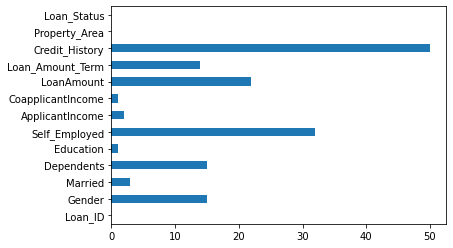

In [381]:
A.isna().sum().plot(kind='barh')

In [382]:
cat=[]
con=[]
for i in A.columns:
    if(A[i].dtype=='object'):
        cat.append(i)
    else:
        con.append(i)

In [383]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [384]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [385]:
CAT=[]
CON=[]
def MDI(Df):
    Q=pd.DataFrame(Df.isna().sum(),columns=['A'])
    for i in list(Q[Q.A>0].index):
        if(Df[i].dtype=='object'):
            CAT.append(i)
        else:
            CON.append(i)
    return CAT,CON

In [386]:
def MDT(Df):
    x,y=MDI(Df)
    for i in x:
        replacer=Df[i].mode()[0]
        Df[i]=Df[i].fillna(replacer)
    for i in y:
        replacer=Df[i].mean()
        Df[i]=Df[i].fillna(replacer)
        

In [387]:
MDT(A)

In [388]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [389]:
dep = []
for i in A.Dependents:
    dep.append(int(i.replace("3+","3")))
A.Dependents=dep

In [390]:
A['Dependents'].dtype

dtype('int64')

# EDA

# Anova Test

In [391]:
def Anova(CON,CAT,Df):
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel=CON+"~"+CAT
    model=ols(rel,Df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_result=anova_lm(model)
    Q=pd.DataFrame(anova_result)
    a=Q['PR(>F)'][CAT]
    print("%.40f"%a)

In [392]:
len(con)

5

In [393]:
for i in range(0,5,1):
    Anova(con[i],"Loan_Status",A)

0.9025179321924293729395571972418110817671
0.1423903217924775976843676517091807909310
0.3676876450819257513558113714680075645447
0.6039634092405201659659041979466564953327
0.0000000000000000000000000000000000000000


# Boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


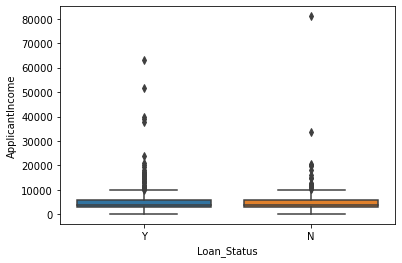

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


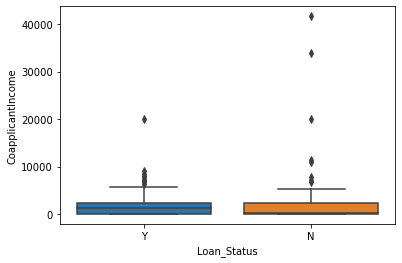

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


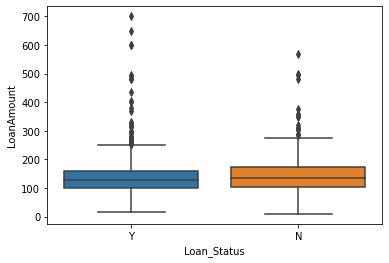

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


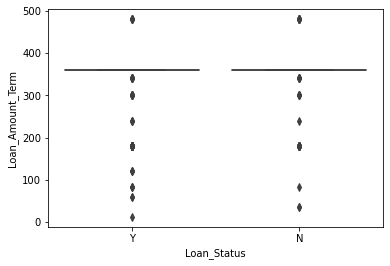

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


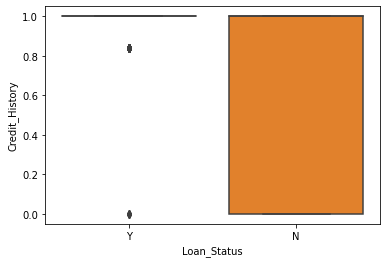

In [394]:
import seaborn as sb
import matplotlib.pyplot as plt
for i in con:
    sb.boxplot(A['Loan_Status'],A[i])
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


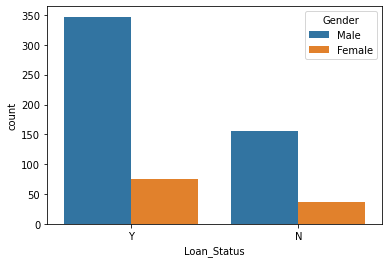

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


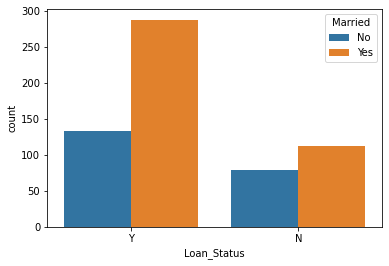

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


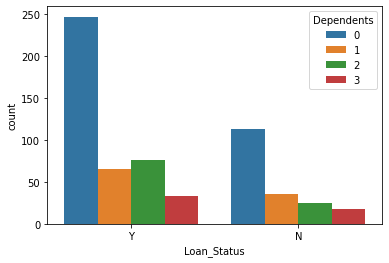

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


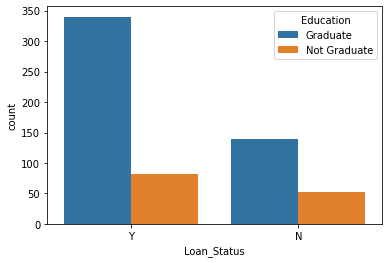

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


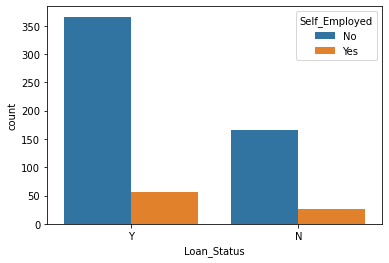

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


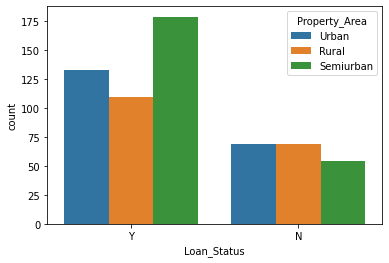

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


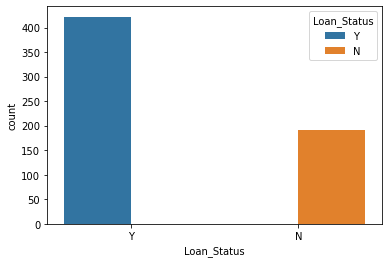

In [395]:
cat.remove('Loan_ID')
for i in cat:
    sb.countplot(A['Loan_Status'],hue=A[i])
    plt.show()

# Logistic Regression
create a model

In [396]:
cat.remove("Loan_Status")
Y=A[['Loan_Status']]
X=A[con].join(pd.get_dummies(A[cat]))

In [397]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)

In [398]:
Y['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [399]:
ytrain['Loan_Status'].value_counts()

Y    335
N    156
Name: Loan_Status, dtype: int64

In [400]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8292682926829268

# Decision Tree Classifier

In [401]:
Y=A[['Loan_Status']]
X=A[con].join(pd.get_dummies(A[cat]))

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)


from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=11)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.6666666666666666

# Pruning
pre-pruning

Minimum samples split

In [402]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=11,min_samples_split=3)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.6829268292682927

# Tuning

In [403]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier(random_state=11)
tp={'min_samples_split':range(2,20,1)}
cv=GridSearchCV(dtc,tp,scoring="accuracy",cv=3)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 16}

In [404]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=11,min_samples_split=16)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.7073170731707317

Minimum samples leaf

In [405]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=11,min_samples_leaf=3)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.6666666666666666

# Tuning

In [406]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier(random_state=11)
tp={'min_samples_leaf':range(2,20,1)}
cv=GridSearchCV(dtc,tp,scoring="accuracy",cv=3)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 19}

In [407]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=11,min_samples_leaf=19)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.7804878048780488

Max depth

In [408]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=11,max_depth=3)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.7967479674796748

# Tuning

In [409]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier(random_state=11)
tp={'max_depth':range(2,20,1)}
cv=GridSearchCV(dtc,tp,scoring="accuracy",cv=3)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 2}

In [410]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=11,max_depth=2)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.8211382113821138

# Random Forest Classifier

In [411]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=11,n_estimators=10)
model = rfc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8049


<ipython-input-411-05bd7bab21cd>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rfc.fit(xtrain,ytrain)


# Pruning

In [412]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=11,max_depth=7,n_estimators=10)
model = rfc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8049


<ipython-input-412-3c05a46fa08e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rfc.fit(xtrain,ytrain)


In [413]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=11,min_samples_leaf=7,n_estimators=10)
model = rfc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


<ipython-input-413-8de2ab86464e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rfc.fit(xtrain,ytrain)


# Ada Boost Classifier

In [414]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),random_state=11,n_estimators=2)

model = abc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# KNN(K-nearest-neighbors)

In [415]:
Y = A[["Loan_Status"]]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
C = pd.DataFrame(ss.fit_transform(A[con]),columns=con)
X = C.join(pd.get_dummies(A[cat]))
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
model = knc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


<ipython-input-415-701ab7c062ed>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model = knc.fit(xtrain,ytrain)


So Ada boost is giving the good accuracy

# Train with entire data 

In [416]:
B=pd.read_csv("C:/Users/Neha/Downloads/testing_set.csv")

In [417]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Data Preprocessing
missing data treatement

In [418]:
MDT(B)

In [419]:
B.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [420]:
dep=[]
for i in B.Dependents:
    dep.append(int(i.replace("3+","3")))
B.Dependents=dep

In [421]:
B.Dependents.dtype

dtype('int64')

# Ada Boost Classifier
create a model using ada boost classifier

In [422]:
Y = A[["Loan_Status"]]
X = A[con].join(pd.get_dummies(A[cat]))
R = B[con].join(pd.get_dummies(B[cat]))
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth=2,random_state=14)
abc = AdaBoostClassifier(dtc1,random_state=228,n_estimators=2)
model = abc.fit(X,Y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [423]:
pred=model.predict(R)
pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [424]:
Q=B[['Loan_ID']]

In [425]:
Q['Predicted_Loan_Status']=pred

<ipython-input-425-ccd5d8e298fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q['Predicted_Loan_Status']=pred


In [426]:
Q

,Loan_ID,Predicted_Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [427]:
R['pred_LS']=pred

In [428]:
R.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,pred_LS
0,5720,0,110.0,360.0,1.000000,0,0,1,0,1,1,0,1,0,0,0,1,Y
1,3076,1500,126.0,360.0,1.000000,1,0,1,0,1,1,0,1,0,0,0,1,Y
2,5000,1800,208.0,360.0,1.000000,2,0,1,0,1,1,0,1,0,0,0,1,Y
3,2340,2546,100.0,360.0,0.825444,2,0,1,0,1,1,0,1,0,0,0,1,Y
4,3276,0,78.0,360.0,1.000000,0,0,1,1,0,0,1,1,0,0,0,1,Y


# Not eligibel for loan

In [429]:
S=R[R['pred_LS']=='N']

In [430]:
S.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,pred_LS
7,3881,0,147.0,360.0,0.0,2,0,1,0,1,0,1,1,0,1,0,0,N
13,12173,0,166.0,360.0,0.0,2,0,1,0,1,1,0,1,0,0,1,0,N
25,0,24000,148.0,360.0,0.0,0,0,1,1,0,1,0,1,0,1,0,0,N
35,3150,0,176.0,360.0,0.0,0,0,1,1,0,1,0,1,0,0,1,0,N
55,2750,0,130.0,360.0,0.0,0,0,1,1,0,1,0,1,0,0,0,1,N


In [431]:
S=S.drop(labels=['pred_LS',"LoanAmount"],axis=1)

In [432]:
M=A[A['Loan_Status']=='Y']
Y=M[['LoanAmount']]
X=M[con].join(pd.get_dummies(M[cat]))
X=X.drop(labels=['LoanAmount'],axis=1)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dtc1 = DecisionTreeRegressor(max_depth=2,random_state=14)
abc = AdaBoostRegressor(dtc1,random_state=228,n_estimators=2)
model = abc.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [433]:
pred_LA=model.predict(S)

In [434]:
pred_LA

array([110.89399564, 203.79814189, 165.27817224, 110.89399564,
       110.89399564, 165.27817224, 110.89399564, 110.89399564,
       110.89399564, 165.27817224, 110.89399564, 110.89399564,
       110.89399564, 110.89399564, 110.89399564, 110.89399564,
       165.27817224, 110.89399564, 165.27817224, 165.27817224,
       203.79814189, 203.79814189, 110.89399564, 203.79814189,
       203.79814189, 110.89399564, 110.89399564, 110.89399564,
       110.89399564, 165.27817224, 110.89399564, 110.89399564,
       165.27817224, 110.89399564, 110.89399564, 110.89399564,
       110.89399564, 110.89399564, 110.89399564, 203.79814189,
       110.89399564, 165.27817224, 203.79814189, 110.89399564,
       110.89399564, 165.27817224, 110.89399564, 110.89399564,
       110.89399564, 110.89399564, 110.89399564, 110.89399564,
       110.89399564, 203.79814189, 110.89399564, 203.79814189,
       165.27817224, 165.27817224, 110.89399564, 110.89399564,
       110.89399564, 165.27817224, 110.89399564])

In [435]:
S['Pred_LA']=pred_LA

In [436]:
S['AppliedLoan']=R[R.pred_LS=='N']['LoanAmount']

In [437]:
S

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Dependents,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_LA,AppliedLoan
7,3881,0,360.0,0.000000,2,0,1,0,1,0,1,1,0,1,0,0,110.893996,147.0
13,12173,0,360.0,0.000000,2,0,1,0,1,1,0,1,0,0,1,0,203.798142,166.0
25,0,24000,360.0,0.000000,0,0,1,1,0,1,0,1,0,1,0,0,165.278172,148.0
35,3150,0,360.0,0.000000,0,0,1,1,0,1,0,1,0,0,1,0,110.893996,176.0
55,2750,0,360.0,0.000000,0,0,1,1,0,1,0,1,0,0,0,1,110.893996,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2875,2416,6.0,0.000000,0,0,1,1,0,1,0,1,0,0,1,0,110.893996,95.0
339,4333,2333,360.0,0.000000,0,1,0,1,0,1,0,1,0,1,0,0,110.893996,162.0
346,3391,1966,360.0,0.000000,0,0,1,0,1,1,0,1,0,1,0,0,110.893996,133.0
351,2283,15000,360.0,0.825444,0,0,1,1,0,1,0,1,0,1,0,0,165.278172,106.0


# People whose loans were rejected and loan term was<=20 years

In [438]:
R.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,pred_LS
0,5720,0,110.0,360.0,1.0,0,0,1,0,1,1,0,1,0,0,0,1,Y
1,3076,1500,126.0,360.0,1.0,1,0,1,0,1,1,0,1,0,0,0,1,Y


In [439]:
prediction_data = R[R.pred_LS=="N"][R.Loan_Amount_Term<=240]
prediction_data.index=range(0,5)

<ipython-input-439-9712babb97bb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prediction_data = R[R.pred_LS=="N"][R.Loan_Amount_Term<=240]


In [440]:
prediction_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,pred_LS
0,4456,0,131.0,180.0,0.0,0,0,1,0,1,1,0,1,0,0,1,0,N
1,3017,2845,159.0,180.0,0.0,0,0,1,1,0,1,0,1,0,0,0,1,N
2,3186,3145,150.0,180.0,0.0,0,0,1,0,1,1,0,1,0,0,1,0,N
3,2875,2416,95.0,6.0,0.0,0,0,1,1,0,1,0,1,0,0,1,0,N
4,5316,187,158.0,180.0,0.0,3,0,1,0,1,0,1,1,0,0,1,0,N


In [441]:
A = A[A.Loan_Status=="Y"]

In [442]:
A = A.drop(labels=['Loan_ID','Loan_Status'],axis=1)

In [443]:
A.index = range(0,422)

In [444]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
A = A[con].join(pd.get_dummies(A[cat]))
#training_data
Y = A[["Loan_Amount_Term"]]
X = A.drop(labels=['Loan_Amount_Term','Dependents'],axis=1)

In [445]:
Y

,Loan_Amount_Term
0,360.0
1,360.0
2,360.0
3,360.0
4,360.0
...,...
417,360.0
418,360.0
419,180.0
420,360.0


In [446]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dtc1 = DecisionTreeRegressor(max_depth=2,random_state=14)
abc = AdaBoostRegressor(dtc1,random_state=228,n_estimators=2)
model=abc.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [447]:
prediction_data=prediction_data.drop(labels=["pred_LS"],axis=1)
prediction_data=prediction_data.drop(labels=['Loan_Amount_Term','Dependents'],axis=1)

In [448]:
model.predict(prediction_data)

array([344.28776978, 344.28776978, 344.28776978, 344.28776978,
       344.28776978])

In [449]:
prediction_data['Pred_LA']=model.predict(prediction_data)

In [450]:
prediction_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_LA
0,4456,0,131.0,0.0,0,1,0,1,1,0,1,0,0,1,0,344.28777
1,3017,2845,159.0,0.0,0,1,1,0,1,0,1,0,0,0,1,344.28777
2,3186,3145,150.0,0.0,0,1,0,1,1,0,1,0,0,1,0,344.28777
3,2875,2416,95.0,0.0,0,1,1,0,1,0,1,0,0,1,0,344.28777
4,5316,187,158.0,0.0,0,1,0,1,0,1,1,0,0,1,0,344.28777
